# Import library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import silhouette_score
from sklearn.ensemble import RandomForestClassifier

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
df = pd.read_csv('/kaggle/input/diabetes-prediction-dataset/diabetes_prediction_dataset.csv')
df.info()

/kaggle/input/diabetes-prediction-dataset/diabetes_prediction_dataset.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


# Data Understanding

In [3]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [4]:
df.duplicated().sum()

3854

In [5]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


Terdapat keanehan: 
- minimal umur adalah 0.08
- max bmi adalah 95.69 sedangkan Q3 29.58
- max blood_glucose adalah 300 sedangkan Q3 159

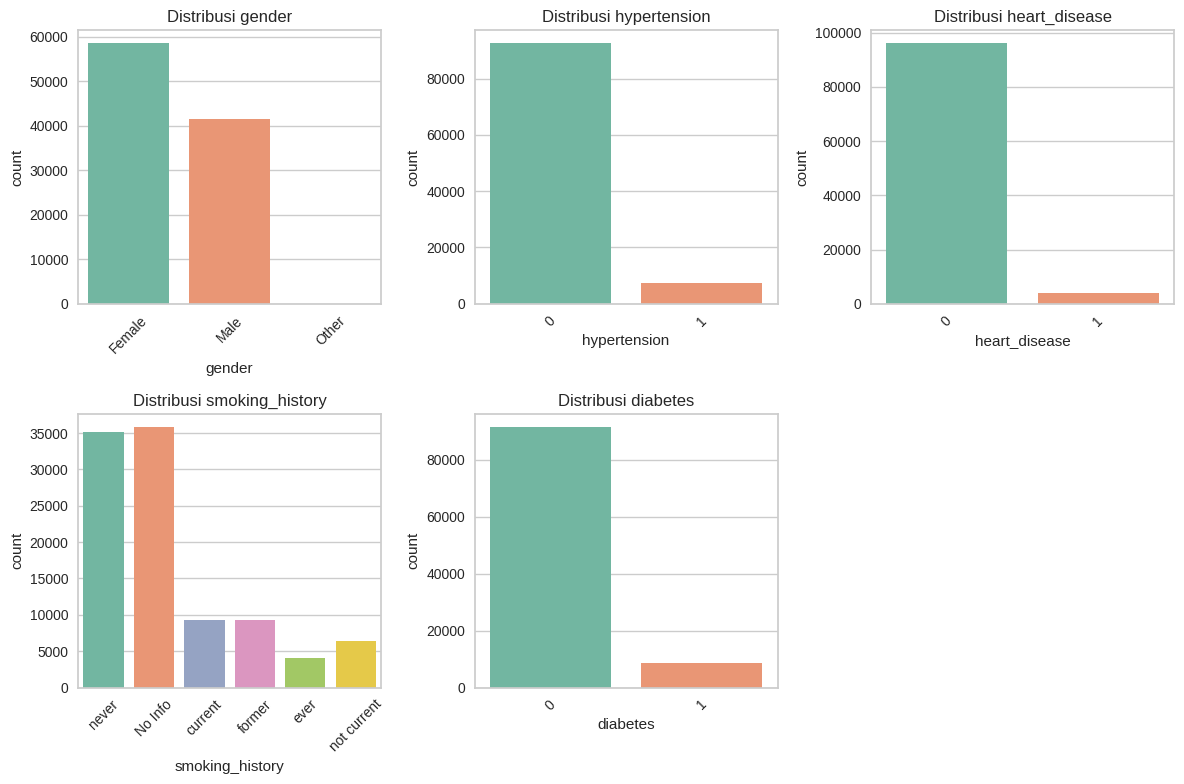

In [6]:
categorical = ['gender', 'hypertension', 'heart_disease', 'smoking_history', 'diabetes']

# create bar chat
fig, axs = plt.subplots(2, 3, figsize=(12, 8))
axs = axs.flatten()

for i, col in enumerate(categorical):
    sns.countplot(data=df, x=col, ax=axs[i], palette="Set2")
    axs[i].set_title(f'Distribusi {col}')
    axs[i].tick_params(axis='x', rotation=45)

# Hilangkan axis yang tidak terpakai
for j in range(len(categorical), len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

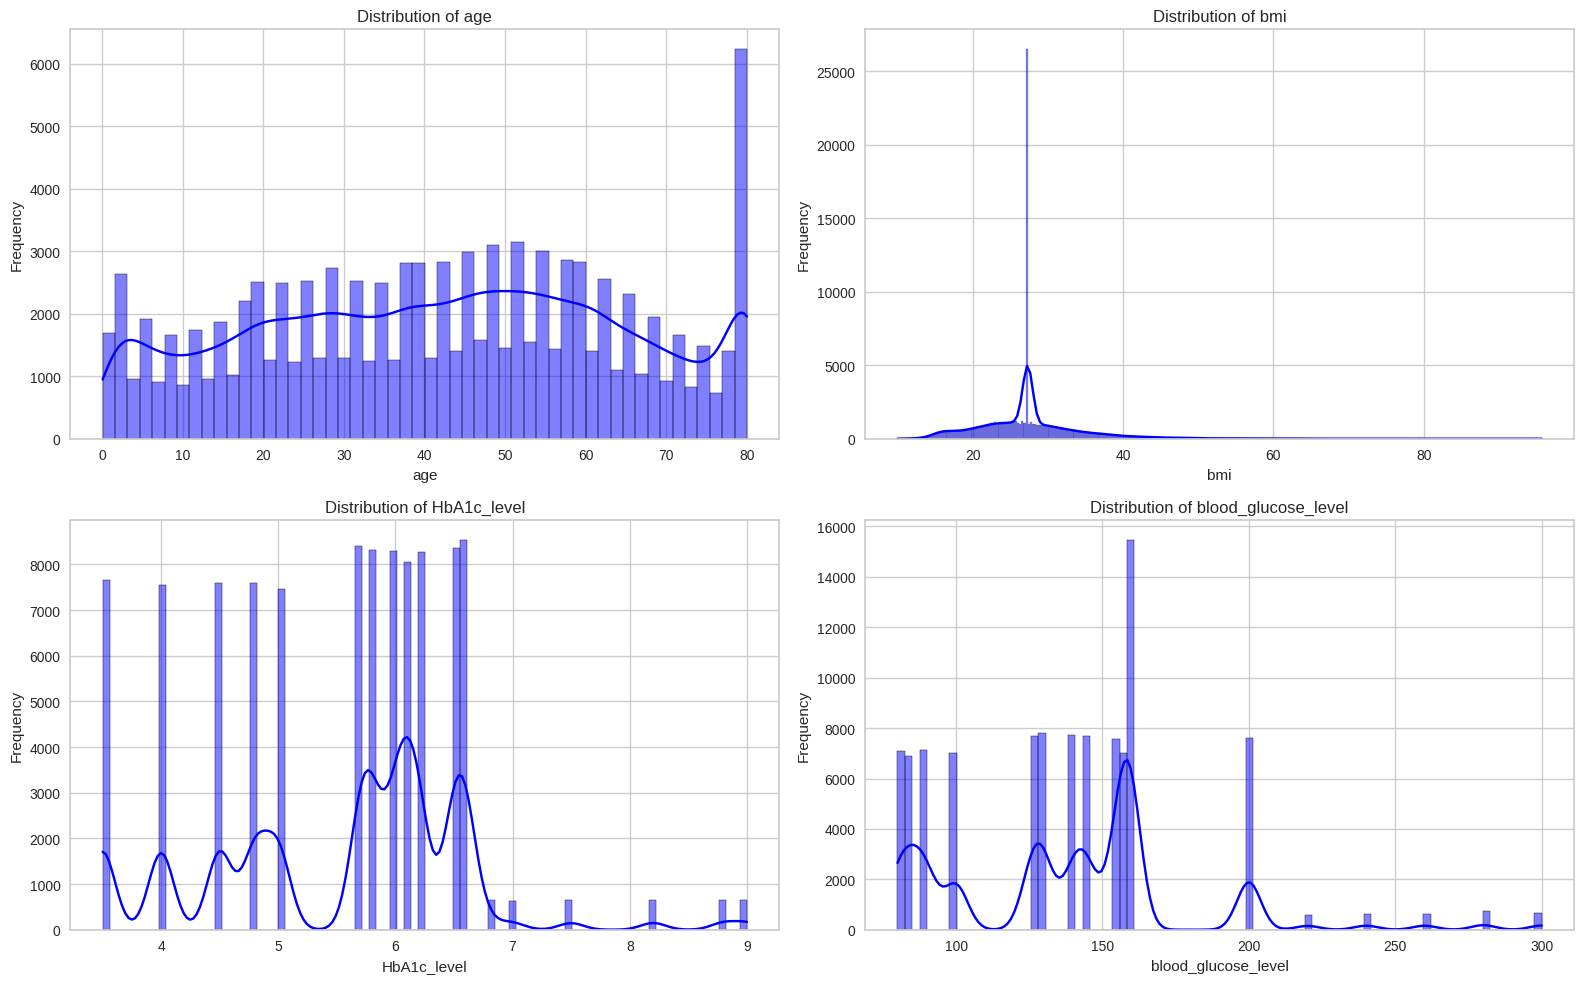

In [7]:
numerical = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

# Create histogram
plt.figure(figsize=(16, 10))
for i, col in enumerate(numerical, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], kde=True, color='blue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

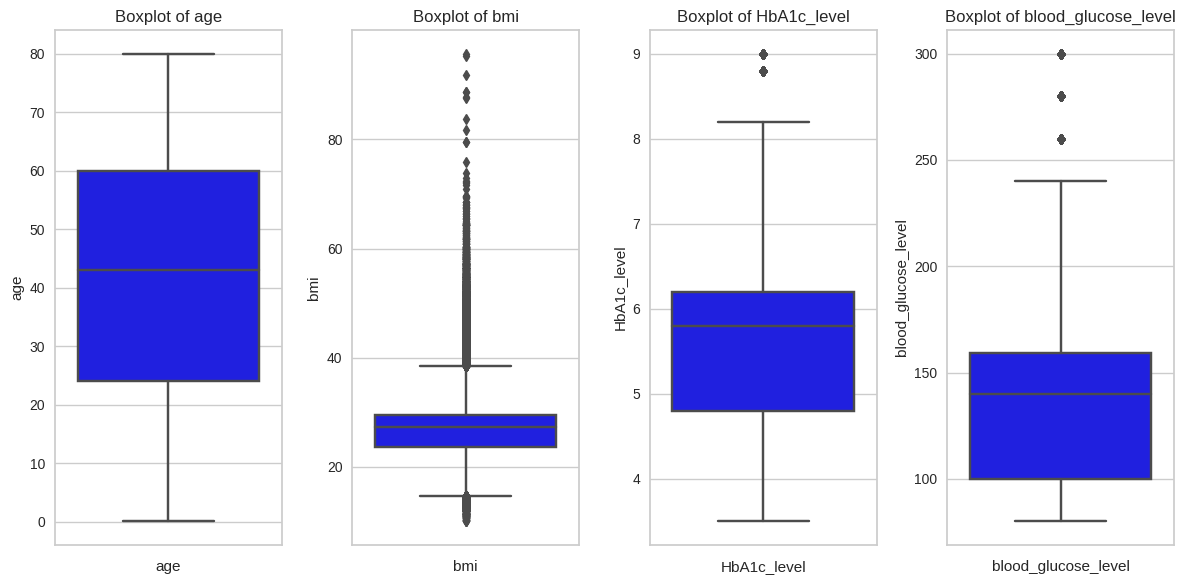

In [8]:
plt.figure(figsize=(12, 6))
for i, col in enumerate(numerical, 1):
    plt.subplot(1, 4, i)
    sns.boxplot(data=df, y=col, color='blue', orient='v')
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
plt.tight_layout()
plt.show()

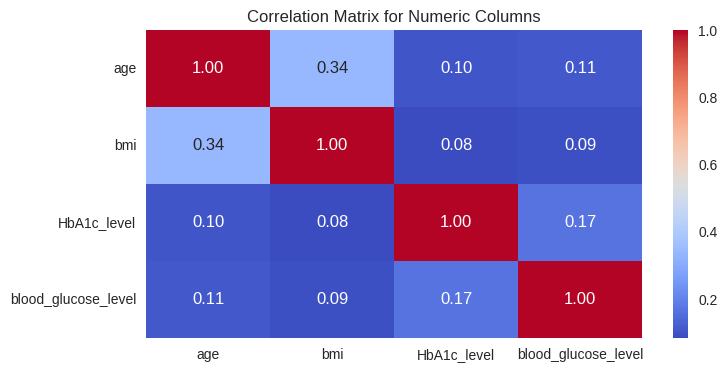

In [9]:
plt.figure(figsize=(8, 4))
correlation_matrix = df[numerical].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Numeric Columns')
plt.show()

# Data Preparation

In [10]:
df.drop(df[df["gender"]=="Other"].index,inplace=True)
df.reset_index(drop=True,inplace=True)

In [11]:
df.drop_duplicates()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99976,Female,36.0,0,0,No Info,24.60,4.8,145,0
99978,Female,2.0,0,0,No Info,17.37,6.5,100,0
99979,Male,66.0,0,0,former,27.83,5.7,155,0
99980,Female,24.0,0,0,never,35.42,4.0,100,0


In [12]:
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

df_cleaned = remove_outliers_iqr(df, numerical)

In [13]:
# One-hot encode smoking_history
df_cleaned = pd.get_dummies(df_cleaned, columns=['smoking_history'], prefix='smoking_history', dtype=int)

# For gender (binary), label encode as 0/1
encoder = LabelEncoder()
df_cleaned['gender'] = encoder.fit_transform(df_cleaned['gender'])

In [14]:
df_cleaned = df_cleaned.rename(columns={
    "smoking_history_No Info": "no_info_smoke",
    "smoking_history_current": "current_smoke",
    "smoking_history_ever": "ever_smoke",
    "smoking_history_former": "former_smoke",
    "smoking_history_never": "never_smoke",
    "smoking_history_not current": "no_current_smoke",
})

In [15]:
scaler = StandardScaler()
df_cleaned[numerical] = scaler.fit_transform(df_cleaned[numerical])

In [16]:
df_cleaned.head()

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,no_info_smoke,current_smoke,ever_smoke,former_smoke,never_smoke,no_current_smoke
0,0,1.710613,0,1,-0.231075,1.149607,0.154223,0,0,0,0,0,1,0
1,0,0.558093,0,0,0.205520,1.149607,-1.550421,0,1,0,0,0,0,0
2,1,-0.594427,0,0,0.205520,0.244934,0.665616,0,0,0,0,0,1,0
3,0,-0.239806,0,0,-0.587730,-0.458700,0.580384,0,0,1,0,0,0,0
4,1,1.533302,1,1,-1.266195,-0.659738,0.580384,0,0,1,0,0,0,0


# Clustering

In [17]:
x = df_cleaned.drop(columns=['diabetes'])
x = x.values
print(x)

[[ 0.          1.71061257  0.         ...  0.          1.
   0.        ]
 [ 0.          0.55809279  0.         ...  0.          0.
   0.        ]
 [ 1.         -0.59442699  0.         ...  0.          1.
   0.        ]
 ...
 [ 1.          1.090025    0.         ...  1.          0.
   0.        ]
 [ 0.         -0.77173773  0.         ...  0.          1.
   0.        ]
 [ 0.          0.69107584  0.         ...  0.          0.
   0.        ]]


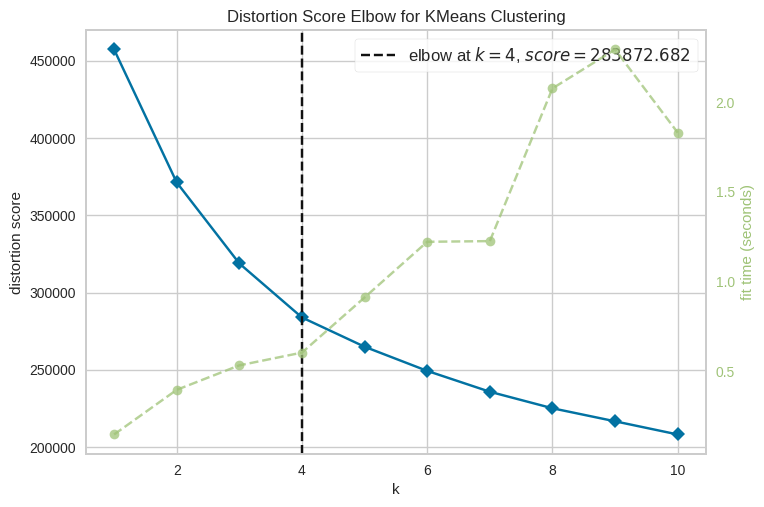

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [18]:
kmeans = KMeans(n_init=10)
visualizer = KElbowVisualizer(kmeans, k=(1, 11), random_state=42)
visualizer.fit(x)
visualizer.show()

In [19]:
silhouette_scores_before = []
k_range = range(2, 11)

# Use a sample to speed up silhouette score computation
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(x)
    score = silhouette_score(x, cluster_labels, sample_size=15000, random_state=42)
    silhouette_scores_before.append(score)


# Metric Evaluation

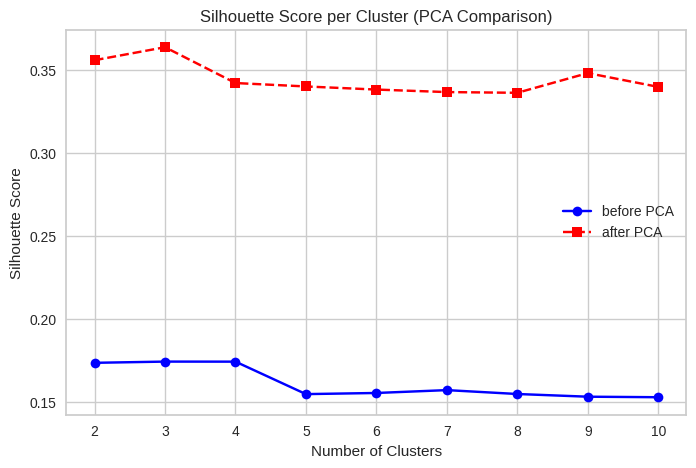

In [20]:
# PCA for dimension reduction
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x)

# K-Means after PCA
silhouette_scores_after = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(x_pca)
    silhouette_scores_after.append(silhouette_score(x_pca, cluster_labels, sample_size=15000, random_state=42))

plt.figure(figsize=(8, 5))
plt.plot(k_range, silhouette_scores_before, marker='o',  label='before PCA', color='blue')
plt.plot(k_range, silhouette_scores_after, marker='s', linestyle='dashed', label='after PCA', color='red')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score per Cluster (PCA Comparison)')
plt.legend()
plt.show()

In [21]:
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
X_cluster_labels = kmeans.fit_predict(x)

# Random Forest untuk memilih fitur terpenting
def random_forest_selection(X, y, feature_names, n_features=5):
    model = RandomForestClassifier(random_state=42)
    model.fit(X, y)
    importances = model.feature_importances_
    indices = np.argsort(importances)[-n_features:]  # top n
    selected_features = [feature_names[i] for i in indices]
    return X[:, indices], selected_features

# Dapatkan nama kolom fitur
feature_names = df_cleaned.columns.tolist()

# Seleksi fitur
X_selected, selected_features = random_forest_selection(x, X_cluster_labels, feature_names)

print("📌 Selected Features (Embedded - Random Forest):", selected_features)

📌 Selected Features (Embedded - Random Forest): ['diabetes', 'bmi', 'age', 'blood_glucose_level', 'HbA1c_level']


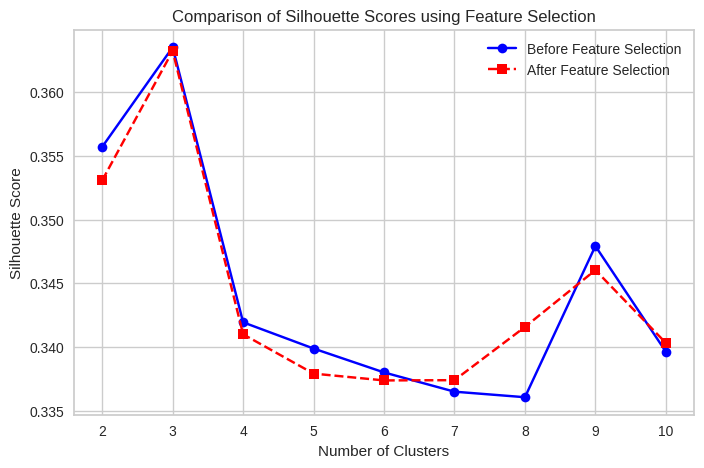

In [22]:
df_cleaned_embedded = df_cleaned.drop(columns=['diabetes'])
selected_features.remove('diabetes')

x_feature_selection = df_cleaned_embedded[selected_features].values

pca = PCA(n_components=2)
x_pca_feature_selection = pca.fit_transform(x_feature_selection)

silhouette_scores_after_feature_selection = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(x_pca_feature_selection)
    silhouette_scores_after_feature_selection.append(silhouette_score(x_pca_feature_selection, cluster_labels, sample_size=15000, random_state=42))


plt.figure(figsize=(8, 5))
plt.plot(k_range, silhouette_scores_after, marker='o', label='Before Feature Selection', color='blue')
plt.plot(k_range, silhouette_scores_after_feature_selection, marker='s', linestyle='--', label='After Feature Selection', color='red')

# Labels, Title, and Legend
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Comparison of Silhouette Scores using Feature Selection')
plt.legend()
plt.show()

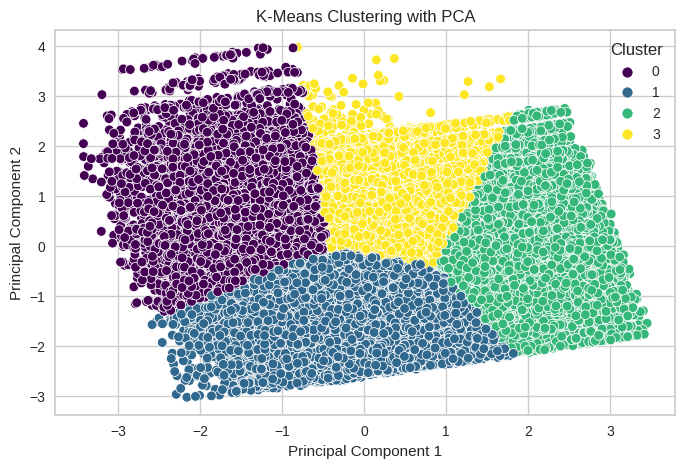

Final Silhouette Score: 0.33835891043469113


In [23]:
df_cluster = df_cleaned
# Visualize Cluster
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df_cluster['Cluster'] = kmeans.fit_predict(x_pca)

plt.figure(figsize=(8, 5))
sns.scatterplot(x=x_pca[:, 0], y=x_pca[:, 1], hue=df_cluster['Cluster'], palette='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering with PCA')
plt.show()

silhouette_avg = silhouette_score(x_pca, kmeans.labels_)
print(f"Final Silhouette Score: {silhouette_avg}")

In [24]:
# Salin DataFrame untuk analisis
df_clusters = df_cluster.copy()

# Pastikan scaler dan gender_encoder sudah tersedia
assert scaler is not None, "Scaler belum didefinisikan"
assert encoder is not None, "Gender encoder belum didefinisikan"

# Fitur numerik yang sudah diskalakan
numeric_features = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

# Inverse transform numerik ke skala asli
df_clusters[numeric_features] = scaler.inverse_transform(df_clusters[numeric_features])

# Decode label encoding gender
df_clusters['gender'] = encoder.inverse_transform(df_clusters['gender'].astype(int))

# Daftar fitur one-hot smoking
smoking_features = [
    'no_info_smoke', 'current_smoke', 'ever_smoke',
    'former_smoke', 'never_smoke', 'no_current_smoke'
]

# Fungsi decode smoking history
def decode_smoking(row):
    for feature in smoking_features:
        if row.get(feature, 0) == 1:
            return feature
    return 'unknown'

# Buat kolom smoking_history dari decoding one-hot
df_clusters['smoking_history'] = df_clusters.apply(decode_smoking, axis=1)

# Drop kolom-kolom one-hot smoking yang lama
df_clusters.drop(columns=smoking_features, inplace=True)

# Pindahkan kolom 'diabetes' ke posisi paling kanan sebelum 'Cluster'
cols = [c for c in df_clusters.columns if c != 'diabetes'] + ['diabetes']
df_clusters = df_clusters[cols]

# Pindahkan kolom 'Cluster' ke posisi paling kanan
cols = [c for c in df_clusters.columns if c != 'Cluster'] + ['Cluster']
df_clusters = df_clusters[cols]

# Pastikan kolom 'Cluster' ada
assert 'Cluster' in df_clusters.columns, "Kolom 'Cluster' belum ada di DataFrame."

In [29]:
df_clusters.head()

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,smoking_history,diabetes,Cluster
0,Female,80.0,0,1,25.19,6.6,140.0,never_smoke,0,0
1,Female,54.0,0,0,27.32,6.6,80.0,no_info_smoke,0,1
2,Male,28.0,0,0,27.32,5.7,158.0,never_smoke,0,3
3,Female,36.0,0,0,23.45,5.0,155.0,current_smoke,0,3
4,Male,76.0,1,1,20.14,4.8,155.0,current_smoke,0,3


In [25]:
# Misal ini fitur numerik dan kategorikal sesuai data kamu
numeric_features = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
categorical_features = ['gender', 'hypertension', 'heart_disease', 'smoking_history']

# Grouping berdasarkan cluster
grouped = df_clusters.groupby('Cluster')

print("--- Analisis Karakteristik Setiap Cluster ---")

for cluster_id, group in grouped:
    print(f"\n✨ Cluster {cluster_id}:")
    print(f"  Jumlah Anggota: {len(group)} data")
    print("-" * 30)

    # Analisis Fitur Kategorikal (Distribusi Frekuensi)
    print("  --- Fitur Kategorikal ---")
    for cat in categorical_features:
        print(f"  {cat.replace('_', ' ').capitalize()}:")
        # Menampilkan value counts dan persentase
        value_counts = group[cat].value_counts(normalize=True) * 100
        for val, percentage in value_counts.items():
            print(f"    - {val}: {percentage:.2f}%")
    
    # Analisis Fitur Numerik (Rata-rata dan Standar Deviasi)
    print("\n  --- Fitur Numerik ---")
    for num in numeric_features:
        avg_val = group[num].mean()
        std_val = group[num].std() # Menambahkan standar deviasi
        print(f"  {num.replace('_', ' ').capitalize()}:")
        print(f"    - Rata-rata: {avg_val:.2f}")
        print(f"    - Standar Deviasi: {std_val:.2f}")
    
    print("=" * 50)

--- Analisis Karakteristik Setiap Cluster ---

✨ Cluster 0:
  Jumlah Anggota: 23139 data
------------------------------
  --- Fitur Kategorikal ---
  Gender:
    - Female: 55.46%
    - Male: 44.54%
  Hypertension:
    - 0: 85.04%
    - 1: 14.96%
  Heart disease:
    - 0: 91.79%
    - 1: 8.21%
  Smoking history:
    - never_smoke: 38.42%
    - no_info_smoke: 23.29%
    - former_smoke: 16.17%
    - current_smoke: 9.38%
    - no_current_smoke: 7.84%
    - ever_smoke: 4.90%

  --- Fitur Numerik ---
  Age:
    - Rata-rata: 60.68
    - Standar Deviasi: 14.44
  Bmi:
    - Rata-rata: 29.77
    - Standar Deviasi: 3.83
  Hba1c level:
    - Rata-rata: 6.02
    - Standar Deviasi: 0.71
  Blood glucose level:
    - Rata-rata: 154.62
    - Standar Deviasi: 29.37

✨ Cluster 1:
  Jumlah Anggota: 29521 data
------------------------------
  --- Fitur Kategorikal ---
  Gender:
    - Female: 59.42%
    - Male: 40.58%
  Hypertension:
    - 0: 93.06%
    - 1: 6.94%
  Heart disease:
    - 0: 96.22%
    - 1: 3

**✨ Cluster 0: Lansia Berisiko Tinggi**

Klaster ini didominasi oleh individu lansia (rata-rata usia 60 tahun) dengan prevalensi hipertensi (15%) dan penyakit jantung (8%) yang cukup tinggi. Tingkat BMI (29.8) mendekati kategori obesitas, dengan HbA1c (6.02) dan glukosa darah (154.6 mg/dL) yang tinggi, mengindikasikan risiko diabetes dan komplikasi metabolik. Riwayat merokok sebagian besar “never” atau “no info”, tetapi tetap perlu perhatian medis.

**✨ Cluster 1: Dewasa Sehat Rendah Risiko**

Klaster ini mencakup individu dewasa (rata-rata 48 tahun) dengan BMI normal ke atas sedikit (27.8), serta HbA1c (4.77) dan glukosa darah paling rendah (110.1 mg/dL),** menandakan kondisi metabolik yang sangat sehat. Prevalensi hipertensi dan penyakit jantung sangat rendah, dan proporsi perokok aktif juga tergolong kecil. Cocok untuk populasi yang cukup stabil secara kesehatan.

**✨ Cluster 2: Anak dan Remaja Sehat**

Klaster ini merepresentasikan populasi anak-anak dan remaja (rata-rata usia hanya 11 tahun) dengan BMI terendah (19.4) dan hampir nol kasus hipertensi atau penyakit jantung. Sebagian besar tidak memiliki riwayat merokok atau datanya tidak tersedia. Klaster ini mencerminkan kelompok dengan risiko metabolik terendah.

**✨ Cluster 3: Dewasa Muda dengan Risiko Glukosa Tinggi**

Klaster ini terdiri dari dewasa muda (rata-rata usia 32.8 tahun) dengan HbA1c cukup tinggi (5.89) dan glukosa darah tinggi (150.6 mg/dL) meskipun prevalensi hipertensi dan penyakit jantung sangat rendah. BMI (25.4) berada pada batas atas normal. Riwayat merokok lebih banyak dibanding klaster lain. Ini menunjukkan kelompok dengan risiko prediabetes yang perlu modifikasi gaya hidup lebih awal.

In [27]:
df_clusters['Cluster'].value_counts()

Cluster
1    29521
0    23139
3    22887
2    14823
Name: count, dtype: int64

In [28]:
df_clusters.to_csv('diabetes_with_cluster.csv', index=False)